In [300]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import os
%matplotlib inline
import matplotlib.pyplot as plt
from io import StringIO

# Data Wrangling
- Data gathering
- Data assessing
- Data cleaning

## Data gathering
- twitter_archive_enhanced.csv, can be downloaded manually
- image_predictions.tsv, hosted on Udacity servers and should be downloaded programmatically using this [url link](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv)
 - How to gather image_predictions.tsv from url, related [link](https://stackoverflow.com/questions/32400867/pandas-read-csv-from-url)
- each tweet's retweet count and favorite ("like") count
 - How to get API Keys and Tokens for Twitter, related [link](https://www.slickremix.com/docs/how-to-get-api-keys-and-tokens-for-twitter/)

In [301]:
#### Gather twitter_archive_enhanced 
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

In [302]:
#### Gather image_predictions.tsv from url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
s = requests.get(url).text
image_predictions = pd.read_csv(filepath_or_buffer = StringIO(s),sep = '\t')
image_predictions.to_csv('image_predictions.tsv',sep = '\t', index=False)

In [130]:
#### Gather additional data like tweet's retweet count, favorite('like') count
####    1.Setup Process   #####################################################
###############################################################################
consumer_key = 'my_key'
consumer_secret = 'my_secret'
access_token = 'my_token'
access_secret = 'my_access_secret'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth,wait_on_rate_limit = True,wait_on_rate_limit_notify = True)

In [ ]:
####   2.Gather json date and write it into tweet_json.txt ###################
##############################################################################
tweet_ids = twitter_archive_enhanced['tweet_id']

for id in tweet_ids:
    try:
        json_data = api.get_status(id, tweet_mode='extended')._json
        with open('tweet_json.txt','a') as outfile:
            json.dump(json_data,outfile)
            outfile.write('\n')
    except tweepy.TweepError as e:
        if e.api_code == 144:
            with open('tweet_ids_not_found.txt','a') as f:
                f.write(str(id) + '\n')

In [303]:
####   3.Get addtional tweet data like favorite_count and retweet_count from tweet_json.txt #######
################################################################################################### 

df_list = []
with open('tweet_json.txt') as f:
    for line in f:
        data = json.loads(line)
        tweet_id = data['id']
        favorite_count = data['favorite_count']
        retweet_count = data['retweet_count']
        df_list.append({'tweet_id':tweet_id,
                        'favorite_count':favorite_count,
                        'retweet_count':retweet_count})
tweet_additional_data = pd.DataFrame(df_list, 
                                     columns = ['tweet_id', 'favorite_count', 'retweet_count'])

## Data Assessing

###  -  Assessing twitter_archive_enhanced table

In [304]:
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [305]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [306]:
twitter_archive_enhanced[twitter_archive_enhanced['retweeted_status_id'].notnull()].sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None


In [307]:
twitter_archive_enhanced[twitter_archive_enhanced['in_reply_to_user_id'].notnull()].sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1618,684969860808454144,6.849598e+17,4.196984e+09,2016-01-07 05:28:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...","For those who claim this is a goat, u are wron...",NaN,NaN,NaN,NaN,5,10,None,None,None,None,None


In [308]:
twitter_archive_enhanced['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [309]:
mask = twitter_archive_enhanced['rating_denominator'] == 11
twitter_archive_enhanced.loc[mask,'text'].values

array([ 'RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…',
       'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ',
       'This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5'], dtype=object)

In [310]:
mask = twitter_archive_enhanced['rating_denominator'] == 90
twitter_archive_enhanced.loc[mask,'text'].values

array([ "Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1"], dtype=object)

In [311]:
names = twitter_archive_enhanced['name']
names.value_counts()

None          745
a              55
Charlie        12
Oliver         11
Cooper         11
Lucy           11
Tucker         10
Lola           10
Penny          10
Winston         9
Bo              9
Sadie           8
the             8
an              7
Daisy           7
Toby            7
Bailey          7
Buddy           7
Scout           6
Leo             6
Jack            6
Dave            6
Oscar           6
Rusty           6
Milo            6
Koda            6
Bella           6
Stanley         6
Jax             6
Larry           5
             ... 
Trevith         1
Blu             1
Deacon          1
Ole             1
Ashleigh        1
Arlen           1
Moofasa         1
Ambrose         1
Rontu           1
Clifford        1
Heinrich        1
Tess            1
Gert            1
Bruno           1
Hermione        1
Ester           1
Brockly         1
Mimosa          1
incredibly      1
Sonny           1
Zara            1
Cermet          1
Wiggles         1
Mack            1
Siba      

In [312]:
names[names.str.islower()].unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [313]:
twitter_archive_enhanced['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

### - Assessing image_predictions table

In [314]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [315]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [316]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [317]:
image_predictions['p1'].unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher', 'Bernese_mountain_dog',
       'box_turtle', 'chow', 'shopping_cart', 'miniature_poodle',
       'golden_retriever', 'Gordon_setter', 'Walker_hound', 'pug',
       'bloodhound', 'Lhasa', 'English_setter', 'hen', 'desktop_computer',
       'Italian_greyhound', 'Maltese_dog', 'three-toed_sloth', 'ox',
       'malamute', 'guinea_pig', 'soft-coated_wheaten_terrier',
       'Chihuahua', 'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama', 'Chesapeake_Bay_retriever',
       'curly-coated_retriever', 'dalmatian', 'Ibizan_hound',
       'Border_collie', 'Labrador_retriever', 'seat_belt', 'snail',
       'miniature_schnauzer', 'Airedale', 'triceratops', 'swab', 'hay',
       'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 'teddy', 

###  -  Assessing tweet_additional_data table

In [318]:
tweet_additional_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 3 columns):
tweet_id          2345 non-null int64
favorite_count    2345 non-null int64
retweet_count     2345 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


In [319]:
tweet_additional_data.sample()

,tweet_id,favorite_count,retweet_count
2237,667866724293877760,3108,1085


In [320]:
tweet_additional_data.describe()

,tweet_id,favorite_count,retweet_count
count,2.345000e+03,2345.000000,2345.000000
mean,7.422940e+17,8094.554797,3040.008529
std,6.833642e+16,12176.480562,5054.673446
min,6.660209e+17,0.000000,0.000000
25%,6.783802e+17,1407.000000,608.000000
50%,7.189392e+17,3549.000000,1423.000000
75%,7.986979e+17,10010.000000,3544.000000
max,8.924206e+17,143881.000000,77678.000000


### Quality Issues:

twitter_archive_enhanced 
 - timestamp related columns should be datatime data type
 - The 'None' values of name,doggo,floofer,pupper,puppo are supposed in NaN format
 - retweeted_status_id,retweeted_status_user_id, in_reply_to_status_id,in_reply_to_user_id are float type(due to the None value, pandas will recast it to float when we make it a DataFrame), which are supposed to be int type
 - Some records get wrong rating_numerator and rating_denominator from text, e.g. take 9/11 (date) from text as dog rate
 - There are some inconsistent dog rate like 99/90,165/150  
 - Get the wrong name of dogs from text, e.g. 'a','an','the','very','incredible','not'
 - content of source column is in html format, we only need the text part for analytical purpose
 - some records have two dog stages
 
image_predictions 
 - Content of p1,p2,p3 not in unified format(lowercase and uppercase)
 - Content of p1,p2,p3 use different delimiters like '_' and '-'
 
### Tidiness Issues:

twitter_archive_enhanced 
 - tweet_id column contains three kinds of tweets like original tweets, in-reply tweets and retweets.
 - retweeted_status_id,retweeted_status_user_id, retweeted_status_timestamp,in_reply_to_status_id,in_reply_to_user_id columns should be removed 
 - doggo,floofer,pupper,puppo should merge into one column describing the dog stages

tweet_additional_data
 - tweet_additional_data should be part of twitter_archive_enhanced table
 
image_predictions tabel
 - image_predictions should be part of twitter_archive_enhanced

## Data Cleaning

In [321]:
twitter_archive_clean = twitter_archive_enhanced.copy()
image_predictions_clean = image_predictions.copy()
tweet_additional_clean = tweet_additional_data.copy()

### Tidiness Issue:
- tweet_id column in twitter_archive_enhanced table contains three kinds of tweets like original tweets, in-reply tweets and retweets.

#### Define
- only keep orginal tweets in twitter_archive_enhanced table, delete records of in-reply tweets and retweets 

#### Code

In [322]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull() & 
                    twitter_archive_clean['in_reply_to_status_id'].isnull()]

#### Test

In [323]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

### Tidiness Issue:
- retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id, in_reply_to_user_id columns should be removed

#### Define
- Leverage pandas DataFrame.drop() function to remove columns not needed

#### Code

In [324]:
twitter_archive_clean.drop(['retweeted_status_id',
                            'retweeted_status_user_id',
                            'retweeted_status_timestamp',
                            'in_reply_to_status_id',
                            'in_reply_to_user_id'], axis=1,inplace = True)

#### Test

In [325]:
twitter_archive_clean.sample()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
888,759846353224826880,2016-07-31 20:21:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kirby. He's a Beneblip Cumberpat. Pret...,https://twitter.com/dog_rates/status/759846353...,11,10,Kirby,None,None,None,None


### Tidiness Issue:
- doggo,floofer,pupper,puppo should merge into one column describing the dog stage
 - related quality issue: The 'None' values of name,doggo,floofer,pupper,puppo are supposed in NaN format

#### Define
- first fix related quality issue by using DataFrame.replace()
- use str.cat() function to get the dog_stage 
- drop doggo,floofer,pupper,puppo column

#### Code & Test

In [326]:
# Replace None with NaN
twitter_archive_clean.replace(to_replace = 'None', value = np.nan, inplace = True)
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1494 non-null object
doggo                 83 non-null object
floofer               10 non-null object
pupper                230 non-null object
puppo                 24 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


In [327]:
# Get dog_stage column
twitter_archive_clean['dog_stage'] = twitter_archive_clean['doggo'].str.cat([twitter_archive_clean['floofer'],
                                                                             twitter_archive_clean['pupper'],
                                                                             twitter_archive_clean['puppo']],
                                                                            sep = ',',
                                                                            na_rep = '')
twitter_archive_clean['dog_stage'] = twitter_archive_clean['dog_stage'].str.strip(',')

In [328]:
twitter_archive_clean['dog_stage'].value_counts()

                 1761
pupper            221
doggo              72
puppo              23
floofer             9
doggo,,pupper       9
doggo,,,puppo       1
doggo,floofer       1
Name: dog_stage, dtype: int64

In [329]:
twitter_archive_clean['dog_stage'].replace('',np.nan,inplace = True)
twitter_archive_clean['dog_stage'].replace('doggo,,pupper','doggo,pupper',inplace = True)
twitter_archive_clean['dog_stage'].replace('doggo,,,puppo','doggo,puppo',inplace = True)

In [330]:
twitter_archive_clean['dog_stage'].value_counts()

pupper           221
doggo             72
puppo             23
floofer            9
doggo,pupper       9
doggo,puppo        1
doggo,floofer      1
Name: dog_stage, dtype: int64

In [331]:
# Drop doggo,floofer,pupper,puppo column
twitter_archive_clean.drop(['doggo',
                            'floofer',
                            'pupper',
                            'puppo'], axis=1,inplace = True)

In [332]:
twitter_archive_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN


### Quality Issue: 
- some records have two dog stage

#### Define
- Since there are totally 11 records need to be handled, I'll modify them manually

#### Code 

In [333]:
twitter_archive_clean['dog_stage'].value_counts()

pupper           221
doggo             72
puppo             23
floofer            9
doggo,pupper       9
doggo,puppo        1
doggo,floofer      1
Name: dog_stage, dtype: int64

In [334]:
# Handle dog_stage is 'doggo,pupper'
mask = twitter_archive_clean['dog_stage'] == 'doggo,pupper'
twitter_archive_clean.loc[mask,'text'].index

Int64Index([460, 531, 575, 705, 733, 889, 956, 1063, 1113], dtype='int64')

In [335]:
twitter_archive_clean.loc[mask,'text'].values

array([ 'This is Dido. She\'s playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7',
       'Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho',
       "This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj",
       "This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd",
       'Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u',
       'Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll',
       "Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat cou

In [336]:
# Based on the information we get in previous two steps.
# We can manually identify that in location 460,575,705,956 should be pupper,pupper,doggo,NaN corresponding
twitter_archive_clean.loc[460,'dog_stage'] = 'pupper'
twitter_archive_clean.loc[575,'dog_stage'] = 'pupper'
twitter_archive_clean.loc[705,'dog_stage'] = 'doggo'
twitter_archive_clean.loc[956,'dog_stage'] = np.nan

In [337]:
# Handle dog_stage is 'doggo,puppo'
mask = twitter_archive_clean['dog_stage'] == 'doggo,puppo'
twitter_archive_clean.loc[mask,'text'].values

array([ "Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel"], dtype=object)

In [338]:
twitter_archive_clean.loc[mask,'dog_stage'] = 'puppo'

In [339]:
# Handle dog_stage is 'doggo,floofer'
mask = twitter_archive_clean['dog_stage'] == 'doggo,floofer'
twitter_archive_clean.loc[mask,'text'].values

array([ "At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk"], dtype=object)

In [340]:
twitter_archive_clean.loc[mask,'dog_stage'] = 'floofer'

#### Test

In [341]:
twitter_archive_clean['dog_stage'].value_counts()

pupper          223
doggo            73
puppo            24
floofer          10
doggo,pupper      5
Name: dog_stage, dtype: int64

### Quality Issue:
- content of source column is in html format, we only need the text part for analysis purpose

#### Define
- Leverage Series.str.split() to get the text we need

#### Code

In [342]:
twitter_archive_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1964
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [343]:
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.split(pat = '<[^>]+>',expand = True).loc[:,1]

#### Test

In [344]:
twitter_archive_clean['source'].value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Quality Issue:
- Get the wrong name of dogs from text, e.g. 'a','an','the','very','incredible','not'

#### Define
- replace name start with lowercase to NaN, since they are not names

#### Code

In [345]:
mask = (twitter_archive_clean['name'].notnull() & twitter_archive_clean['name'].str.islower())
twitter_archive_clean[mask].name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my',
       'his', 'an', 'actually', 'just', 'getting', 'mad', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [346]:
twitter_archive_clean.loc[mask,'name'] = np.nan

#### Test

In [347]:
twitter_archive_clean[mask].name.unique()

array([nan], dtype=object)

### Quality Issue:
- Get wrong rating_numerator and rating_denominator from text, e.g. take 9/11 (date) from text as dog rate

#### Define
- Check the irregular rating_numerator value other than 10, and find the corresponding text.
- Since there are now only 4 wrong dog_rate left in table, I decide to modify this manually

#### Code 

In [348]:
mask = twitter_archive_clean['rating_denominator'] != 10
twitter_archive_clean[mask][['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
433,The floofs have been released I repeat the flo...,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
902,Why does this never happen at my front door......,165,150
1068,"After so many requests, this is Bretagne. She ...",9,11
1120,Say hello to this unbelievably well behaved sq...,204,170
1165,Happy 4/20 from the squad! 13/10 for all https...,4,20
1202,This is Bluebert. He just saw that both #Final...,50,50
1228,Happy Saturday here's 9 puppers on a bench. 99...,99,90
1254,Here's a brigade of puppers. All look very pre...,80,80
1274,"From left to right:\nCletus, Jerome, Alejandro...",45,50


In [349]:
twitter_archive_clean[mask]['text'].values

array([ 'The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd',
       'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx',
       'Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE',
       'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ',
       'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv',
       'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a',
       'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq',
       "Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1",
       "Here's a brigade of pu

In [350]:
# Handle wrong dog_rate in loaction of 1068,1165,1202,2335 with the right dog_rate of 14/10,13/10,11/10,9/10 corresponding
twitter_archive_clean.loc[1068,['rating_numerator','rating_denominator']] = [14,10]
twitter_archive_clean.loc[1165,['rating_numerator','rating_denominator']] = [13,10]
twitter_archive_clean.loc[1202,['rating_numerator','rating_denominator']] = [11,10]
twitter_archive_clean.loc[2335,['rating_numerator','rating_denominator']] = [9,10]

#### Test

In [351]:
twitter_archive_clean[mask][['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
433,The floofs have been released I repeat the flo...,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
902,Why does this never happen at my front door......,165,150
1068,"After so many requests, this is Bretagne. She ...",14,10
1120,Say hello to this unbelievably well behaved sq...,204,170
1165,Happy 4/20 from the squad! 13/10 for all https...,13,10
1202,This is Bluebert. He just saw that both #Final...,11,10
1228,Happy Saturday here's 9 puppers on a bench. 99...,99,90
1254,Here's a brigade of puppers. All look very pre...,80,80
1274,"From left to right:\nCletus, Jerome, Alejandro...",45,50


### Quality Issue:
- There are some inconsistent dog rate format like 99/90,165/150  

#### Define
- transform dog_rate to the same xx/10 rating system

#### Code

In [352]:
mask = twitter_archive_clean['rating_denominator'] != 10
indexes= twitter_archive_clean[mask].index
twitter_archive_clean[mask][['rating_numerator','rating_denominator']]

,rating_numerator,rating_denominator
433,84,70
516,24,7
902,165,150
1120,204,170
1228,99,90
1254,80,80
1274,45,50
1351,60,50
1433,44,40
1635,121,110


In [353]:
for index in indexes:
    numerator = twitter_archive_clean.loc[index,'rating_numerator']
    denominator = twitter_archive_clean.loc[index,'rating_denominator']
    twitter_archive_clean.loc[index,'rating_numerator'] = int(numerator * 10 / denominator)
    twitter_archive_clean.loc[index,'rating_denominator'] = 10

#### Test

In [354]:
twitter_archive_clean[mask][['rating_numerator','rating_denominator']]

,rating_numerator,rating_denominator
433,12,10
516,34,10
902,11,10
1120,12,10
1228,11,10
1254,10,10
1274,9,10
1351,12,10
1433,11,10
1635,11,10


In [355]:
twitter_archive_clean['rating_denominator'].value_counts()

10    2097
Name: rating_denominator, dtype: int64

### Quality Issue:
- Content of p1,p2,p3 not in unified format(lowercase and uppercase)
- Content of p1,p2,p3 use different delimiters like '_' and '-'

#### Define
- define a new function to return strings in unified format(lowercase,connected by '_')

#### Code

In [356]:
def convert_str(s):
    s = s.replace('-','_')
    s_list = pd.Series(s.split('_'))
    s_list = s_list.str.lower()
    return '_'.join(s_list)
    

In [357]:
image_predictions_clean['p1'] = image_predictions_clean['p1'].apply(convert_str)
image_predictions_clean['p2'] = image_predictions_clean['p2'].apply(convert_str)
image_predictions_clean['p3'] = image_predictions_clean['p3'].apply(convert_str)

#### Test

In [358]:
s = 'Welsh_springer-Spaniel'
convert_str(s)

'welsh_springer_spaniel'

### Quality Issue:
- timestamp should be datetime data type

#### Define
- Convert timestamp to datetime by using pandas.to_datetime() function

#### Code

In [359]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

#### Test

In [360]:
twitter_archive_clean.timestamp.dtype

dtype('<M8[ns]')

### Tidiness Issue: 
- tweet_additional_data should be part of twitter_archive_enhanced table

#### Define
- Merge tweet_additional_data to twitter_archive_enhanced table based on tweet_id

#### Code 

In [361]:
twitter_archive_clean = pd.merge(twitter_archive_clean, 
                                 tweet_additional_clean,
                                 on=['tweet_id'], 
                                 how='left')

#### Test

In [362]:
twitter_archive_clean.sample()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count
2074,666337882303524864,2015-11-16 19:31:45,Twitter for iPhone,This is an extremely rare horned Parthenon. No...,https://twitter.com/dog_rates/status/666337882...,9,10,NaN,NaN,199,93


### Tidiness Issue: 
- image_predictions should be part of twitter_archive_enhanced

#### Define
- Merge image_predictions to twitter_archive_enhanced table based on tweet_id

#### Code 

In [363]:
twitter_archive_clean = pd.merge(twitter_archive_clean, 
                                 image_predictions_clean,
                                 on=['tweet_id'], 
                                 how='left')

#### Test

In [364]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 22 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1390 non-null object
dog_stage             335 non-null object
favorite_count        2097 non-null int64
retweet_count         2097 non-null int64
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-null object
p3_conf               1971 n

# Data Storing

In [365]:
twitter_archive_clean.to_csv('twitter_archive_master.csv',sep = ',', index=False)

# Data Analyzing and Visualizing

### First Insight
- Based on the link given in the project introduction part, we get to know that there is a Twitter user @brant who took issue with WeRateDogs' rating system, and tweeting the account to say it's dosen't make any sense. The following is a snapshot of what he said.

<img src="images/good-dogs.png" width="50%">

- So, the first question I'm interested in is that does WeRateDogs acctually give most of the dogs 11s and 12s?

In [405]:
# Calculate the total number and percentage of posted tweets for each score 
data_by_score = pd.DataFrame()
data_by_score['number'] = twitter_archive_clean['rating_numerator'].value_counts().sort_values(ascending = False)
total = twitter_archive_clean['tweet_id'].count()
data_by_score['percentage'] = data_by_score['number'] / total
data_by_score

,number,percentage
12,490,0.233667
10,437,0.208393
11,419,0.199809
13,288,0.137339
9,154,0.073438
8,98,0.046733
7,51,0.024320
14,39,0.018598
5,34,0.016214
6,33,0.015737


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f26d8fd3400>], dtype=object)

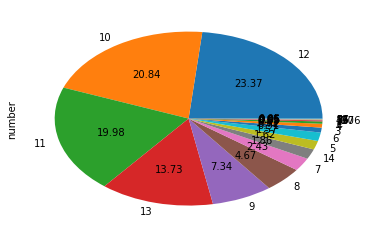

In [415]:
data_by_score['number'].plot.pie(subplots = True,autopct='%.2f')

In [369]:
# Calculate the percentage of score over 10
data_by_score[data_by_score.index >= 10].sum()['percentage']

0.80066762041010953

Text(0.5,1,'Score Over Time')

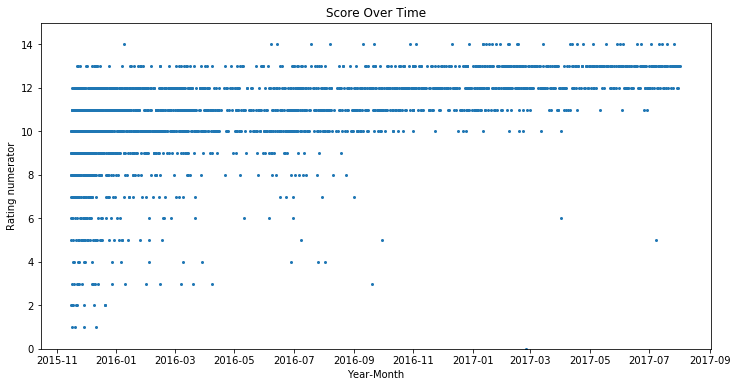

In [370]:
plt.figure(1,figsize = (12,6))
plt.plot(twitter_archive_clean['timestamp'], 
         twitter_archive_clean['rating_numerator'],
         linestyle = '',
         marker = 'o',
         ms = 2,
         )
plt.ylim(0,15)
plt.xlabel('Year-Month')
plt.ylabel('Rating numerator')
plt.title('Score Over Time')

- As we can see from the data_by_score table and pie chart, the most frequent scores WeRateDogs have given is 12s, 10s,11s, and they acount for 23.37%,20.84%,19.98% corresponding, 12s and 11s acount for 43.35% in total. Based on the statistical result, we cannot say that WeRateDogs give the most 12s and 11s, since the percent is under 50%. However, I think what brant means it's WeRateDogs usually give dogs scores over 10, and the chance we see scores like 13/10,12/10,11/10,10/10 is actually reaching 77.92% which it's a pretty high frequency. 
- Another interesting thing we can find in 'Score Over Time' plot is WeRateDogs barely gave score under 10 after 2016-10, and 'they are good dogs Brent' tweet was posted on 09-12-2016! Before 2016-10 WeRateDogs did give some scores under 10 and after that time WeRateDogs actually convert his rating system to give every dog over 10 ,because they are good dogs *^o^* ! 

### Second Insight
- Based on our first insight, WeRateDogs usually give dogs over 10 because they are good dogs, so is it possible that tweets with higher rate(which also means dogs are cuter under WeRateDogs rating system) are more likely to get higher favorite count and retweet count?
- The metric I used to analysis for this question would be the mean number of favorite_count and retweet_count, so some scores that only ocurred once (outlier) would not be taken into consideration.

In [371]:
data_by_score = data_by_score[data_by_score.number > 1]
data_by_score = data_by_score.sort_index()

In [372]:
favorite_retweet_count = twitter_archive_clean.groupby('rating_numerator').mean()[['favorite_count','retweet_count']]
data_by_score[['favorite_count','retweet_count']] = favorite_retweet_count.loc[data_by_score.index]
data_by_score

,number,percentage,favorite_count,retweet_count
1,4,0.001907,6987.750000,3081.750000
2,9,0.004292,2204.888889,1310.777778
3,19,0.009061,2343.578947,926.473684
4,15,0.007153,2677.400000,1074.933333
5,34,0.016214,3857.647059,1291.852941
6,33,0.015737,3791.454545,1547.363636
7,51,0.024320,2965.215686,1038.686275
8,98,0.046733,2388.775510,880.214286
9,154,0.073438,2375.103896,796.850649
10,437,0.208393,4096.757437,1487.485126


Text(0,0.5,'The total number of posted tweets')

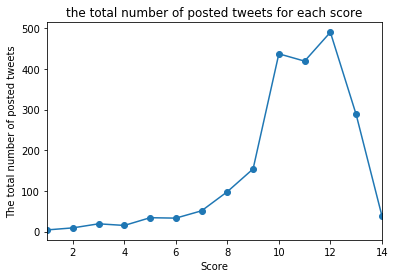

In [373]:
data_by_score['number'].plot(marker='o')
plt.title('the total number of posted tweets for each score')
plt.xlabel('Score')
plt.ylabel('The total number of posted tweets')

Text(0,0.5,'Mean number')

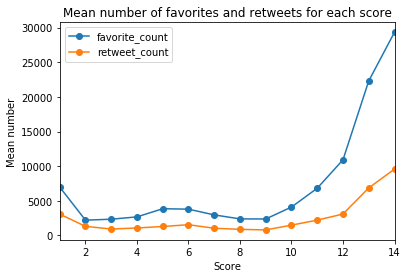

In [374]:
data_by_score[['favorite_count','retweet_count']].plot(marker='o')
plt.title("Mean number of favorites and retweets for each score")
plt.xlabel('Score')
plt.ylabel('Mean number')

In [375]:
tweets_score_1 = twitter_archive_clean[twitter_archive_clean['rating_numerator'] == 1]
tweets_score_1.text.values

array([ "What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://t.co/RDXCfk8hK0",
       "Flamboyant pup here. Probably poisonous. Won't eat kibble. Doesn't bark. Slow af. Petting doesn't look fun. 1/10 https://t.co/jxukeh2BeO",
       'Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not even cordless. 1/10 https://t.co/i9iSGNn3fx',
       "Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX"], dtype=object)

- Based on two plots above, although the relationship between score and favorite count/retweet count is not clear when score is under 10, we actually can tell that when score is over 10, the favorite count and retweet count increase rapidly as score goes up. And we can see that scores over 10 get higher favorite count and retweet count comparing to scores under 10 if we remove score 1. Since score 1/10 only appeared 4 times, I dig deeper to see what's these four tweets like, it turns out three of them are not dogs, and it's pretty hilarious when we see no-dog pictures with WeRateDogs's comments, it's rare and also funny but it's not related to this insight we analyze. At last, considering the first insight we've already got, we know that scores like 10/10,11/10,12/10,13/10,14/10 accounts for 80% of the whole sample data. So it makes sense for us to say that tweets with higher rate are more likely to get higher favorite count and retweet count.

### Third insight
- The third question I'm interested in is that Has WeRateDogs account actually kept growing up over time? To be more specific, has WeRateDogs account been able to get an increase in followers, favorite count and retweet_count month by month?
 - since we don't have historical data of followers number, I'll use mean number of favorite count and retweet_count for each month as the metric to measure the growth of WeRateDogs account.

In [376]:
data_by_month = pd.DataFrame()
twitter_archive_clean['year_month'] = twitter_archive_clean['timestamp'].dt.to_period('M')
data_by_month[['year_month','tweet_number']] = twitter_archive_clean.groupby('year_month',as_index = False).count()[['year_month','tweet_id']]
data_by_month[['favorite_mean','retweet_mean']] = twitter_archive_clean.groupby('year_month',as_index = False).mean()[['favorite_count','retweet_count']]
data_by_month

,year_month,tweet_number,favorite_mean,retweet_mean
0,2015-11,296,1276.135135,546.364865
1,2015-12,372,3544.895161,1530.903226
2,2016-01,183,4179.546448,1644.830601
3,2016-02,121,4152.520661,1539.247934
4,2016-03,132,4601.378788,1724.568182
5,2016-04,60,4593.733333,1587.916667
6,2016-05,59,6205.440678,2215.084746
7,2016-06,90,9408.100000,4093.988889
8,2016-07,96,7499.989583,2809.531250
9,2016-08,61,10110.721311,3532.967213


In [377]:
# Since we don't have data beyond August 1st,2017,
# that means we only have data of 2017-08-01 for that month
# and we need to remove 2017-08 record in data_by_month 
data_by_month.drop([21],inplace = True)

Text(0.5,1,'number of tweets posted each month')

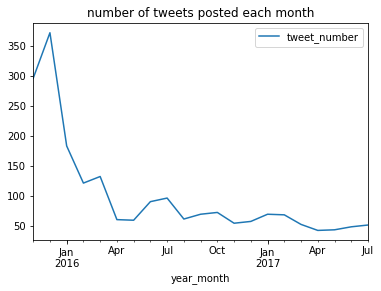

In [378]:
data_by_month.plot(x='year_month', y ='tweet_number')
plt.title('number of tweets posted each month')

Text(0.5,1,'mean number of favorites and retweets for each month')

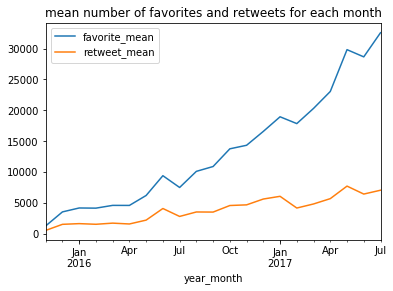

In [379]:
data_by_month.plot( x = 'year_month', y = ['favorite_mean','retweet_mean'])
plt.title('mean number of favorites and retweets for each month')

- As we can see from the data_by_month table and last plot above, the mean number of tweet's favorite count and retweet count kept increasing over time, but the growth rate of retweet count is slower than that of favorite count. The mean number of favorite and retweet started at 1276 and 546 at 2015-11, and finally they got 32563,7055 at 2017-07 seperately. The mean number of favorite and retweet increased 24.52 and 11.92 times from 2015-11 to 2017-07. 
- After I got these result, I did some more search about favorites and retweets. And I get to know that they are both effective measures of Twitter engagement by determining interests and preferences among followers. But beneath the surface, retweets imply a reach that extends far beyond current followers in a way that can’t be achieved through favorites,[related link](https://medium.com/@Encore/favorites-vs-retweets-and-why-one-is-more-important-than-the-other-ba12ee20e9ba). So I think the next step that WeRateDogs should give more consideration to is how to maximize the number of retweets each post receives to connect with a broader audience beyond immediate followers